## (I) Data Importing and Exploration + Getting to Know the Domain

In [120]:
import pandas as pd

In [121]:
df = pd.read_csv('measurements.csv', sep=",")

In [122]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [123]:
df.shape

(388, 12)

In [124]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [125]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [126]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [127]:
type(df['speed'][0])

numpy.int64

In [128]:
type(df['consume'][0])

str

### Some observations till now:

1) AC stands for Air Conditionning

2) Columns like "consume" should be changed its type

3) Columns "specials" and "AC" tell the same thing

4) The NaN in the column "temp_inside" should be imputed by average

5) The last two columns should be removed

6) "cunsume" and "gas_type" are the most important columns, allowing us to answer the main question: which is the best combustible?

## (II) Data Cleaning and Figure Engineering

### 2) Columns like "consume" should be changed its type

In [129]:
#df['consume'].astype(float)

# ValueError: could not convert string to float: '4,2'

In [130]:
df['consume']

0        5
1      4,2
2      5,5
3      3,9
4      4,5
      ... 
383    3,7
384    4,3
385    3,8
386    4,6
387      5
Name: consume, Length: 388, dtype: object

In [131]:
def replace_value(value):
    value2 = value.replace(',','.')
    return value2

df['consume'] = df['consume'].apply(replace_value)

In [132]:
df['consume']

0        5
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387      5
Name: consume, Length: 388, dtype: object

In [133]:
df['consume'] = df['consume'].astype(float)

In [134]:
type(df['consume'][2])

numpy.float64

### 3) Columns "specials" and "AC" tell the same thing

In [135]:
# Since "specials" contains a lot of NaN, I decide to drop it

In [136]:
df.drop(columns=['specials'],axis=1,inplace=True)

In [137]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun', 'refill liters', 'refill gas'],
      dtype='object')

### 4) The NaN in the column "temp_inside" should be imputed by average

In [138]:
# But first, I need to change the type of the columnn

In [139]:
df['temp_inside'].isna().sum()

12

In [140]:
df['temp_inside'][0]

'21,5'

In [141]:
df['temp_inside'].dtypes

dtype('O')

In [142]:
df['temp_inside'][0].replace(',','.')

'21.5'

I don't know why the function below doesn't work. Anyway, I change to another simpler solution

def replace_value2(value):
    if type(value) == string:
        value2 = value.replace(',','.')
    return value2

df['temp_inside'] = df['temp_inside'].apply(replace_value2)

In [143]:
df['temp_inside'] = df['temp_inside'].str.replace(',','.')

In [144]:
df['temp_inside']

0      21.5
1      21.5
2      21.5
3      21.5
4      21.5
       ... 
383    24.5
384      25
385      25
386      25
387      25
Name: temp_inside, Length: 388, dtype: object

In [145]:
df['temp_inside'] = df['temp_inside'].astype(float)

In [146]:
df['temp_inside'][387]

25.0

In [147]:
mean_temp_inside = df['temp_inside'].mean()

In [148]:
df['temp_inside'] = df['temp_inside'].fillna(mean_temp_inside)

In [149]:
df['temp_inside'].isna().sum()

0

### 5) The last two columns should be removed

In [150]:
df.drop(columns=['refill liters','refill gas'],axis=1,inplace=True)

In [151]:
df.tail()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
383,16,3.7,39,24.5,18,SP98,0,0,0
384,"16,1",4.3,38,25.0,31,SP98,1,0,0
385,16,3.8,45,25.0,19,SP98,0,0,0
386,"15,4",4.6,42,25.0,31,SP98,1,0,0
387,"14,7",5.0,25,25.0,30,SP98,1,0,0


### Supplementary examinations

In [152]:
df.shape

(388, 9)

In [153]:
df.dtypes

distance         object
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [154]:
# 'distance' need to be changd type

In [155]:
df['distance'] = df['distance'].str.replace(',','.')

In [156]:
df['distance'] = df['distance'].astype(float)

In [157]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [158]:
df['temp_inside']

0      21.5
1      21.5
2      21.5
3      21.5
4      21.5
       ... 
383    24.5
384    25.0
385    25.0
386    25.0
387    25.0
Name: temp_inside, Length: 388, dtype: float64

In [159]:
df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [160]:
df['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

## (III) Visualization and Find Connections between Data

In [161]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


### Some observations and hypothesis:

1) The goal is to compare the consumption of two gas types to see which one is more economic

2) We should also check the influence of other parameters. For example, AC probably increases gas consumption

3) Both visualization and crosstab can help to find connections

### Heatmap

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# I have to first convert "gas_type" to numerical

In [165]:
def convert_value(value):
    if value == 'E10':
        value2 = 0
    else:
        value2 = 1
    return value2

df['gas_type_numerical'] = df['gas_type'].apply(convert_value)

In [166]:
df_numerical = df.drop(columns="gas_type",axis=1)

In [167]:
df_numerical.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_numerical
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0


In [168]:
df_numerical.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_numerical
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,0.022761
gas_type_numerical,-0.053411,-0.015327,-0.097360,0.010198,0.148705,0.105285,0.060328,0.022761,1.000000


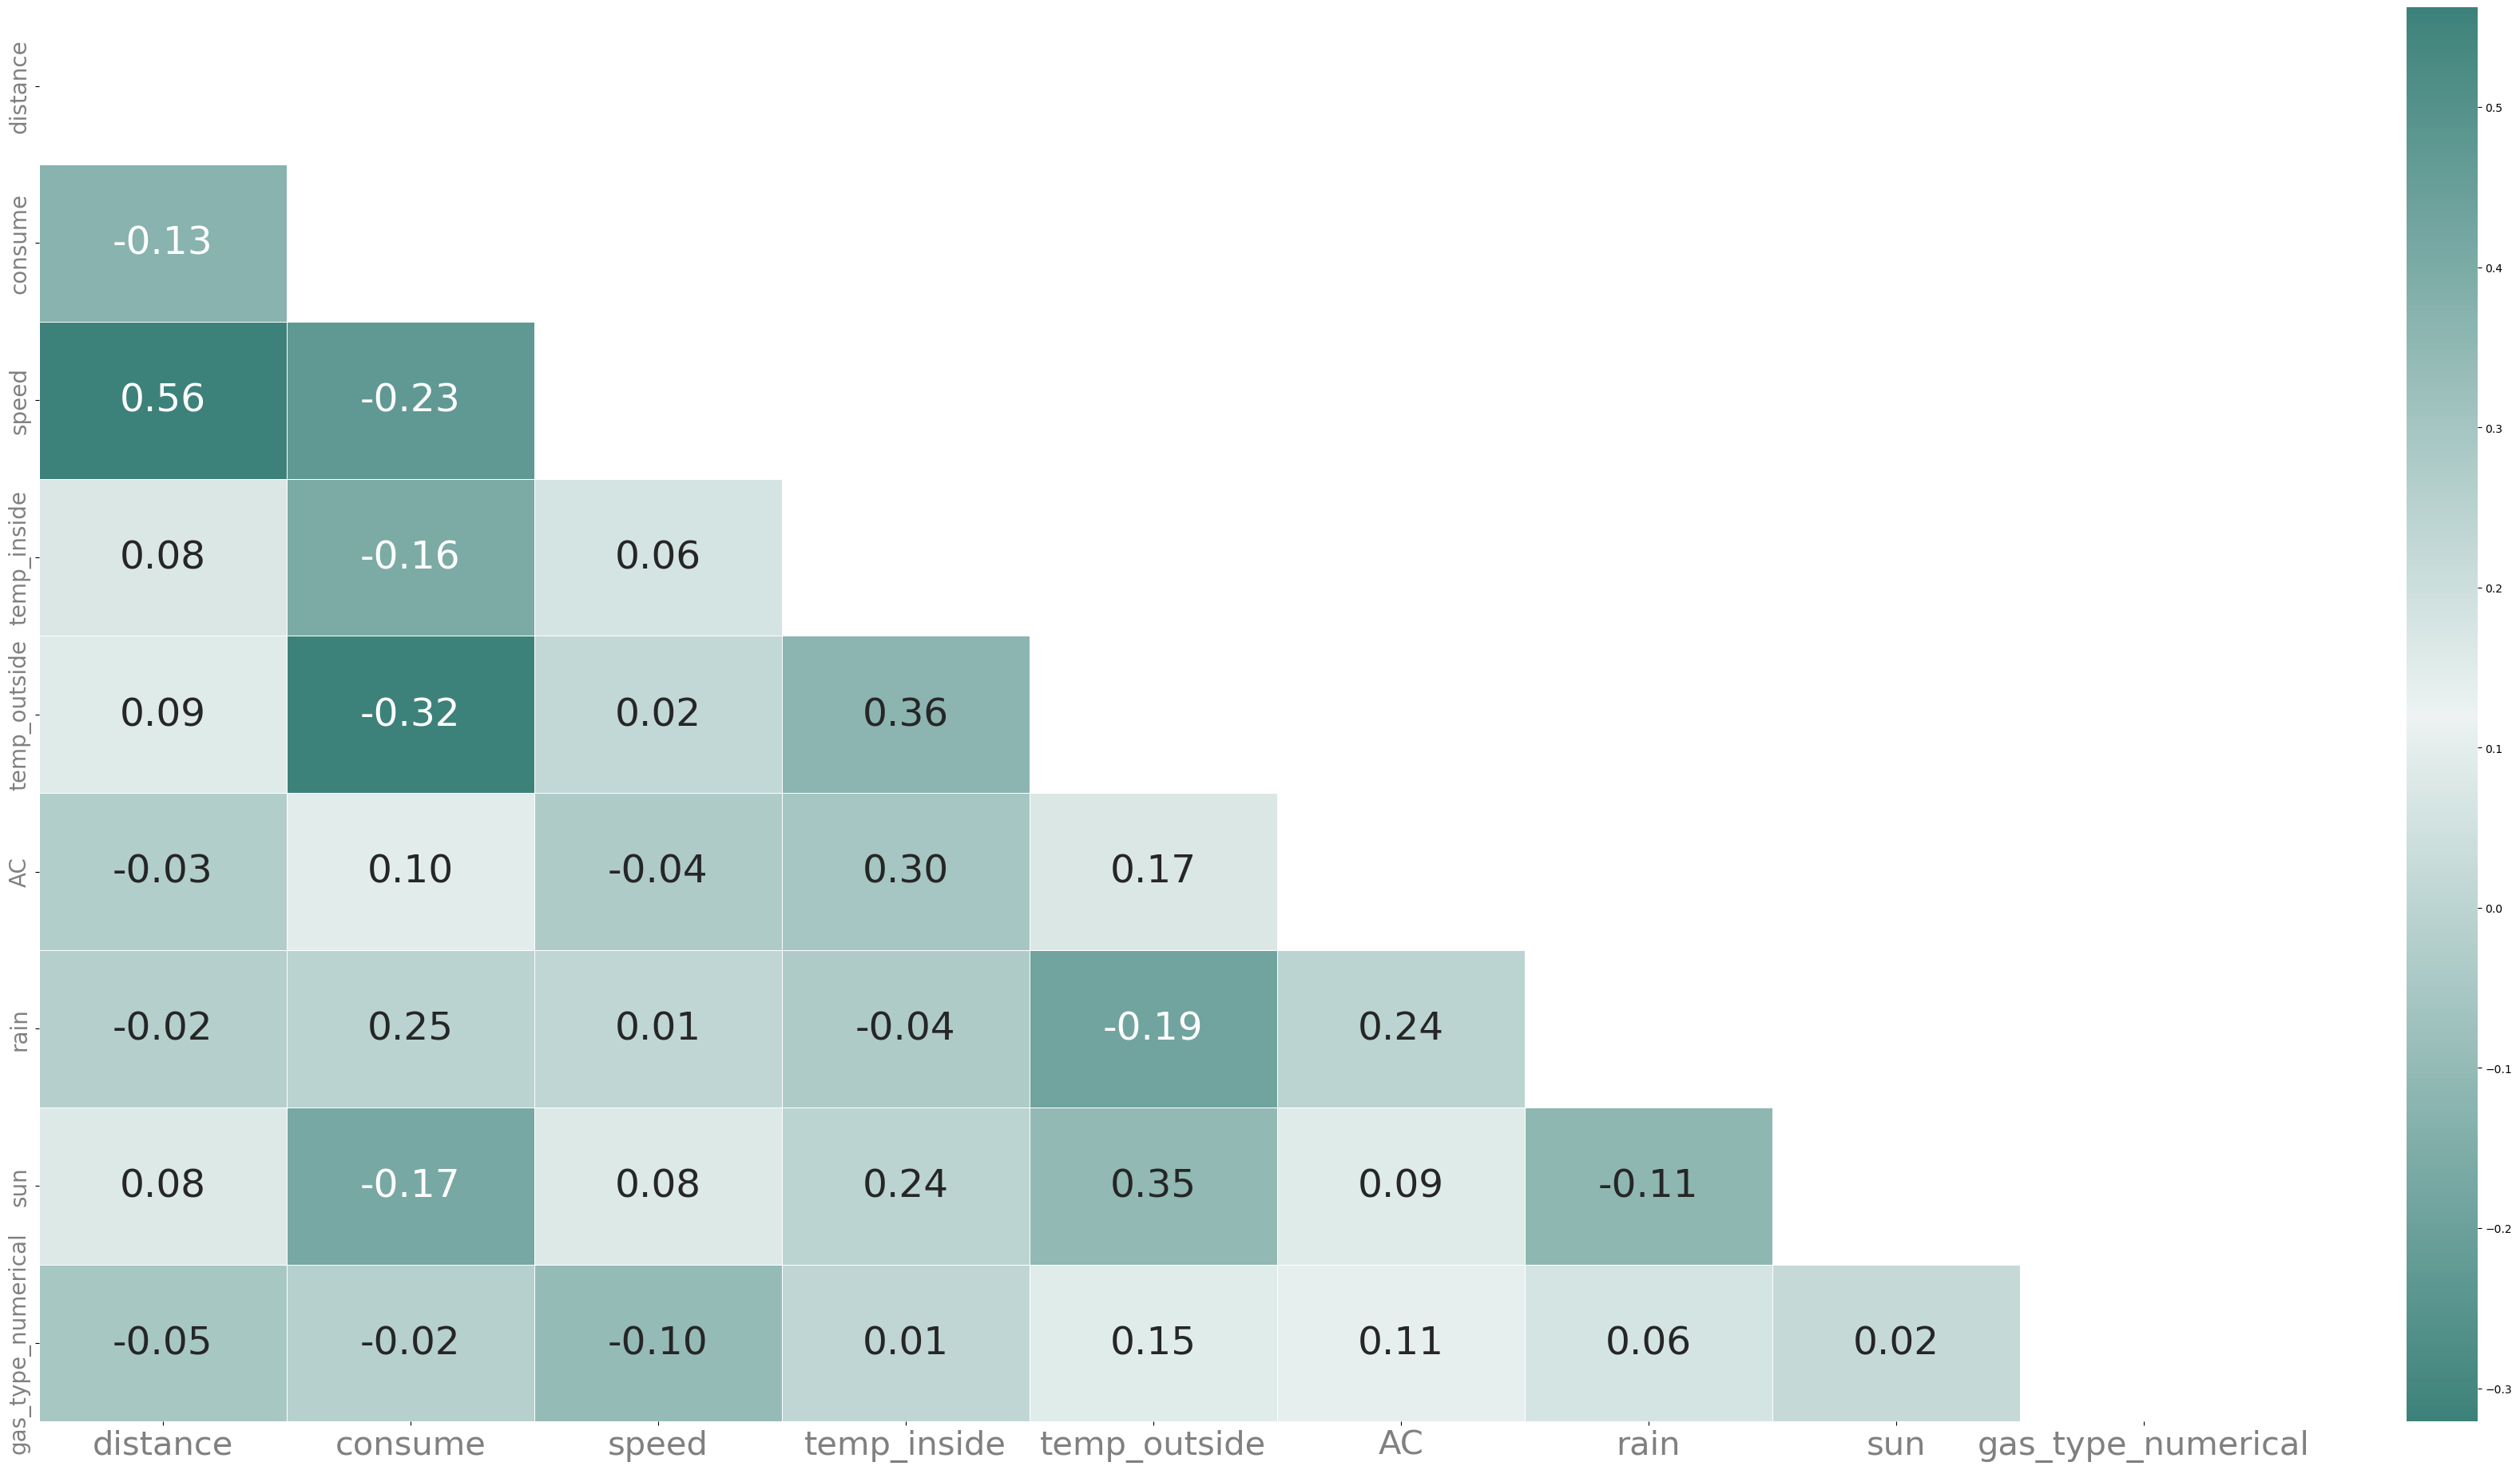

In [188]:
corr_matrix = df_numerical.corr()
fig, ax = plt.subplots(figsize=(45, 23))

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(180, 180, as_cmap=True)

g = sns.heatmap(corr_matrix, mask=mask, fmt=".2f", cmap=cmap, linewidths=.5, annot=True, annot_kws={"fontsize":35})
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("20")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("30")
plt.show()

### The take-aways of the Heatmap:
    
1) There is no significant correlation between gas type and consumption

2) The three most relavant parameters as with consumption are 'temp_outside', 'rain', and 'speed'. While the relavance to 'temp_outside' and 'speed' corresponds to the common knowledge, why 'rain' affects the consumption in a more significant way than 'sun' and 'AC' remains to be interrogated

3) By the fact that 'distance' has little impact on consumption, we tend to guess that the column 'cunsume' means 'the consumption amount per distance unit' instead of 'the total consumption amount of a trip'

### Complementary calculations

In [190]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_type_numerical
0,28.0,5.0,26,21.5,12,E10,0,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0


In [191]:
list(df.columns)

['distance',
 'consume',
 'speed',
 'temp_inside',
 'temp_outside',
 'gas_type',
 'AC',
 'rain',
 'sun',
 'gas_type_numerical']

In [193]:
parameters_lst = ['distance',
 'consume',
 'speed',
 'temp_inside',
 'temp_outside',
 'AC',
 'rain',
 'sun']

In [194]:
parameter_means = df.groupby('gas_type')[parameters_lst].mean()

In [195]:
parameter_means

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
gas_type,,,,,,,,
E10,21.096250,4.931250,43.506250,21.917429,10.11875,0.043750,0.100000,0.075000
SP98,18.639912,4.899123,40.820175,21.938007,12.22807,0.100877,0.140351,0.087719


### The take-aways of the Mean matrics:

1) It seems that 'E10' gas is more suitable (or, at least, more used) for long-distance transport maybe because it supports better a more speedy drive

2) 'SP96' has its advantage in other ways: it consumes less fuel (as far as the real situation as informed by the data), can be used for more time outside. Besides, vehicles consuming 'SP95' are better equiped with AC, which is a big bonus for drivers  

## (IV) Prediction Preparation through LinearRegression 

### The goal of the following steps:

1) The goal here is not to thoroughly apply the LinearRegression Model. It is much more limited. The goal is to measure the weight of different parameters to the fuel consumption

2) To measure the weight, we will calculate the Coefficient of each parameter

In [196]:
from sklearn.linear_model import LinearRegression

In [199]:
df_numerical.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_numerical
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0


In [201]:
X = df_numerical.drop(columns=['consume'],axis=1)
Y = df_numerical['consume']

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [202]:
parameters = df_numerical.drop(columns=['consume'], axis=1)
coefficients = lr.coef_
coefficients_df = pd.DataFrame({'Parameters': parameters.columns, 'Coefficient': coefficients})

In [203]:
coefficients_df

,Parameters,Coefficient
0,distance,0.001985
1,speed,-0.018232
2,temp_inside,-0.077060
3,temp_outside,-0.039726
4,AC,0.467078
5,rain,0.520792
6,sun,-0.131193
7,gas_type_numerical,-0.036871


### The take-aways of the LinearRegression:

1) Contrast to the result of the Heatmap, 'temp_outside' and 'speed' have little importance here

2) The most important parameters prove to be 'rain' and 'AC'. We feel that the correlation between Air Conditionning and fuel Consumption is valid, which in turn suggets the validity of the coefficient examination

3) This examination still rejects any significant connections between gas type and consumption

## (V) Final Conclusions:

1) By the fact that 'distance' has little impact on consumption, we tend to guess that the column 'cunsume' means 'the consumption amount per distance unit' instead of 'the total consumption amount of a trip'

2) It seems that 'E10' gas is more suitable (or, at least, more used) for long-distance transport maybe because it supports better a more speedy drive

3) 'SP96' has its advantage in other ways: it consumes less fuel (as far as the real situation as informed by the data), can be used for more time outside. Besides, vehicles consuming 'SP95' are better equiped with AC, which is a big bonus for drivers

4) The outcome of the LinearRegression seems to be more valid than that of the Heatmap

5) Based more on the outcome of the LinearRegression, we find out that the most important parameters prove to be 'rain' and 'AC' as to their influence on fuel consumption

6) Based on the currrent results, we cannot conclude which of the two gas types is better. They each have their own advantage in terms of transport conditions and driver's need

7) To make more insightful conclusions and predictions, we will have to collect more data
